In [1]:
import os
import cv2
import time
import numpy as np
from tqdm import tqdm
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt


## Route Setting

In [8]:
# 경로 설정
root_path = r"C:\Users\DI Lee\Desktop\capstone\dataset\nose_print\noseprint_1" #원천 이미지 & 라벨링 디렉토리
image_path = root_path + "train_images(origin)/" # 원천 이미지 디렉토리
# label_path = root_path + "train_labels(origin)/" # 원천 이미지 라벨 디렉토리

images = list(os.listdir(image_path))
print(len(images), images[:5], sep="\n")
# labels = list(os.listdir(label_path))
# print(len(labels), labels[:5], sep="\n")

SyntaxError: EOL while scanning string literal (2718407128.py, line 3)

## Augmentation

## first

#### Categorize Augmented Data

In [3]:
aug_name = "aug_canny_" # 원하는 파일명 적기

In [4]:
for img in tqdm(images):
#     print(img)
    image = cv2.imread(image_path + img) # 이미지 불러오기
#     print(image)

    height, width = image.shape[:2] # 원천 이미지 픽셀 불러오기 (height, weight, dimension)
    image_size = [width, height] # cv2는 height * weight를 출력하기 때문에 width, height형식으로 변환

    seq = iaa.Sequential([
        iaa.AddToHueAndSaturation((-20, 20), per_channel = True),
        iaa.Sometimes(0.5, iaa.Invert(0.1, per_channel = True)),
        iaa.Sometimes(0.2, iaa.Grayscale(alpha = (0.0, 0.5))),
        iaa.OneOf([iaa.Flipud(0.3), # 30%의 이미지 상하 반전
                 iaa.Fliplr(0.4)]), # 40%의 이미지 좌우 반전
#         iaa.Sometimes(0.5, iaa.Superpixels(p_replace = (0, 0.5), n_segments = (20, 100))), # Superpixels: 비슷한 색/밝기를 가진 pixel 그룹화
        iaa.Sometimes(0.5, iaa.LinearContrast((0.75, 1.5), per_channel = 0.5)), # LinearContrast: 이미지 일정 부분의 톤 차이를 돋보이게 만듦, 강한 대비
        iaa.Sometimes(0.5, iaa.Affine(shear = (-4, 4), # Affine: 이미지 회전
                                    rotate = (-40, 40), fit_output = True)), # fit_output: True 값을 적용해야 회전시켜도 이미지가 잘리지 않음
#         iaa.Sometimes(0.5, iaa.Emboss(alpha = (0, 0.5), strength = (0, 1.0))), # Emboss: 이미지 입체감 부여
#         iaa.OneOf([iaa.Grayscale(alpha = (0.0, 0.3)),
#                 iaa.MedianBlur(k = (3, 11))]), # MedianBlur: 이미지 블러 처리
        iaa.Sometimes(0.5, iaa.Sharpen(alpha = (0, 0.5), lightness = (0.75, 1.5)))], # Sharpen: 흐릿한 이미지를 선명하게 만듦
        random_order = True)

    image_aug = seq(image=image) # image_aug : 증강된 이미지, bbs_aug : 증강이 적용된 bounding box 좌표

    cv2.imwrite(root_path + "aug_img/"  + aug_name + img, image_aug) # 증강 이미지 저장

100%|███████████████████████████████████████████████████████████████████████████████| 962/962 [00:01<00:00, 493.79it/s]


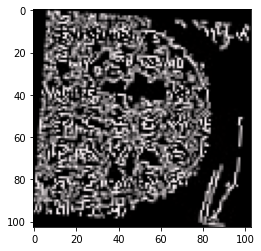

In [5]:
plt.imshow(image_aug.squeeze(), cmap='gray')

In [6]:
cv2.imwrite(root_path + "aug_img/"  + aug_name + img, image_aug)

False